# Date-time Review

In [1]:
# Get python libraries import

from libraries import*

In [12]:
# Use pdr import to get tesla data 
tesla = pdr.get_data_yahoo('TSLA')

# Feature engineer columns
tesla['year'] = tesla.index.year
tesla['month'] = tesla.index.month
tesla['day'] = tesla.index.day
tesla['week_day'] = tesla.index.day_name()

In [13]:
tesla.head(n = 15)

,High,Low,Open,Close,Volume,Adj Close,year,month,day,week_day
Date,,,,,,,,,,
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999,2017,6,27,Tuesday
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001,2017,6,28,Wednesday
2017-06-29,74.199997,70.820000,74.122002,72.150002,41105000.0,72.150002,2017,6,29,Thursday
2017-06-30,73.353996,71.924004,72.741997,72.321999,29242500.0,72.321999,2017,6,30,Friday
2017-07-03,74.269997,70.300003,74.047997,70.524002,31527000.0,70.524002,2017,7,3,Monday
2017-07-05,69.447998,65.265999,69.440002,65.417999,85233500.0,65.417999,2017,7,5,Wednesday
2017-07-06,64.157997,61.259998,63.452000,61.765999,96622500.0,61.765999,2017,7,6,Thursday
2017-07-07,63.400002,61.476002,62.700001,62.644001,70884500.0,62.644001,2017,7,7,Friday
2017-07-10,63.588001,60.625999,62.580002,63.209999,69104500.0,63.209999,2017,7,10,Monday


In [14]:
tesla.index

DatetimeIndex(['2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30',
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11',
               ...
               '2022-06-10', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [15]:
# Describe
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close,year,month,day
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000
mean,337.120130,321.127417,329.463404,329.345875,4.442477e+07,329.345875,2019.481717,6.541335,15.734499
std,353.894334,336.666908,345.812088,345.373686,3.009779e+07,345.373686,1.497832,3.427433,8.759190
min,37.335999,35.397999,36.220001,35.793999,9.800600e+06,35.793999,2017.000000,1.000000,1.000000
25%,63.375000,60.965000,62.417501,62.284500,2.525975e+07,62.284500,2018.000000,4.000000,8.000000
50%,84.330002,79.669003,81.528999,83.303001,3.459330e+07,83.303001,2019.000000,7.000000,16.000000
75%,678.017517,644.667496,662.612503,661.437500,5.157088e+07,661.437500,2021.000000,10.000000,23.000000
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034,2022.000000,12.000000,31.000000


In [16]:
# Check for nulls

tesla.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
year         False
month        False
day          False
week_day     False
dtype: bool

In [23]:
# Make copy of the DF
df = tesla.copy()

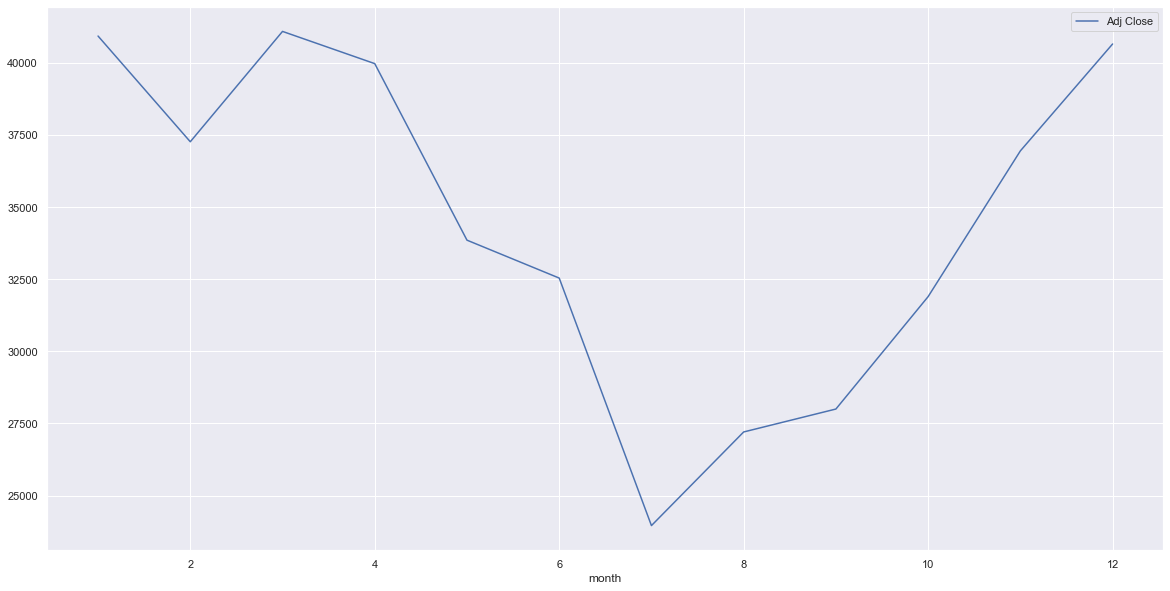

In [31]:
# Target variable == Adj Close

monthly_close_adj =df.groupby(['month'])['Adj Close'].sum().reset_index()

monthly_close_adj.plot(x = 'month', y = 'Adj Close')
None

<AxesSubplot:xlabel='Date'>

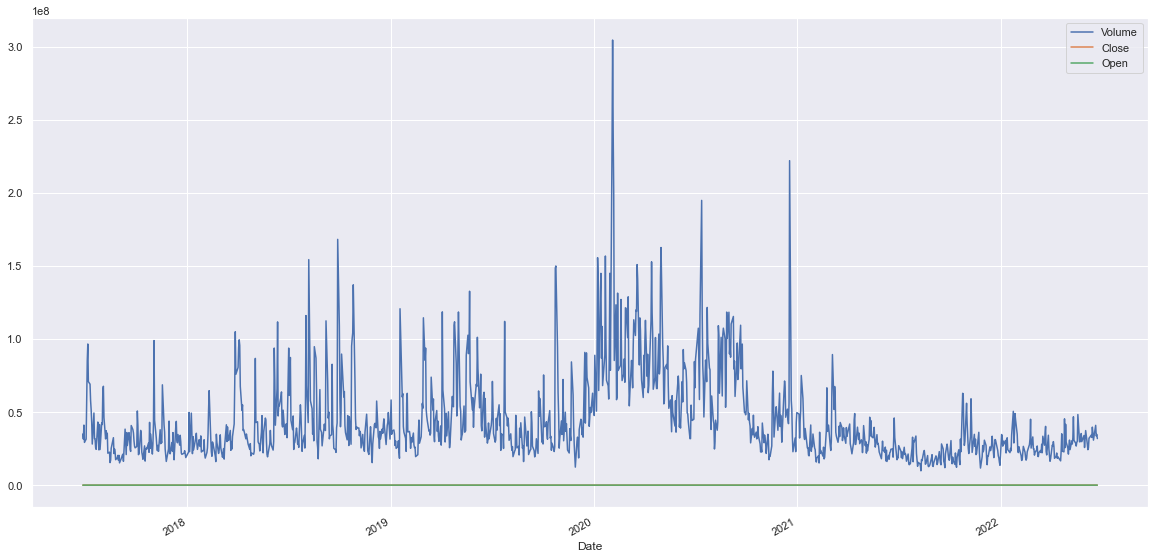

In [36]:
df[['Volume', 'Close', 'Open']].plot()

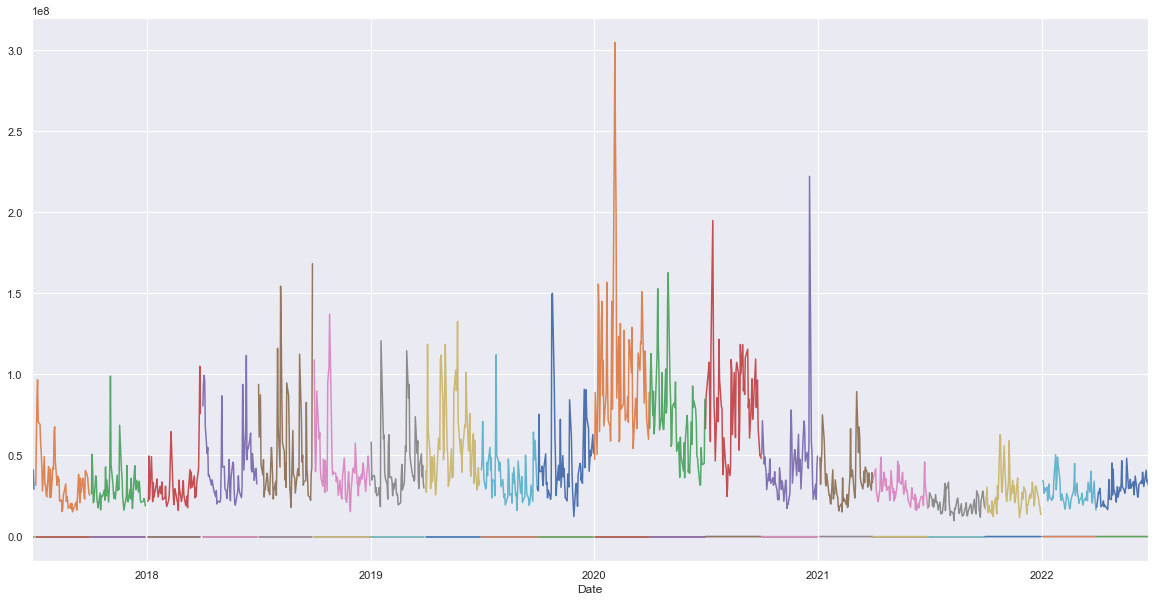

In [50]:
# Every 3 months

df[['Volume', 'Close', 'Open']].resample('3M').plot()
None

In [30]:
df.resample('2W').mean()

,High,Low,Open,Close,Volume,Adj Close,year,month,day
Date,,,,,,,,,
2017-07-02,74.295498,71.913000,73.869999,72.798500,3.421050e+07,72.798500,2017.0,6.000000,28.500000
2017-07-16,66.549333,63.880667,65.795556,65.016444,5.933311e+07,65.016444,2017.0,7.000000,9.000000
2017-07-30,67.419199,65.268200,66.522399,66.537800,3.315265e+07,66.537800,2017.0,7.000000,22.500000
2017-08-13,70.526001,68.244401,69.284399,69.402400,4.242935e+07,69.402400,2017.0,7.900000,8.600000
2017-08-27,71.417001,69.728800,70.792999,70.427600,2.264730e+07,70.427600,2017.0,8.000000,19.500000
...,...,...,...,...,...,...,...,...,...
2022-05-01,997.194989,935.376996,978.893994,952.769006,2.806333e+07,952.769006,2022.0,4.000000,23.500000
2022-05-15,864.730994,803.688013,841.915002,832.248004,2.971524e+07,832.248004,2022.0,5.000000,7.500000
2022-05-29,723.198999,673.169000,699.709998,699.832996,3.182833e+07,699.832996,2022.0,5.000000,21.500000


<AxesSubplot:>

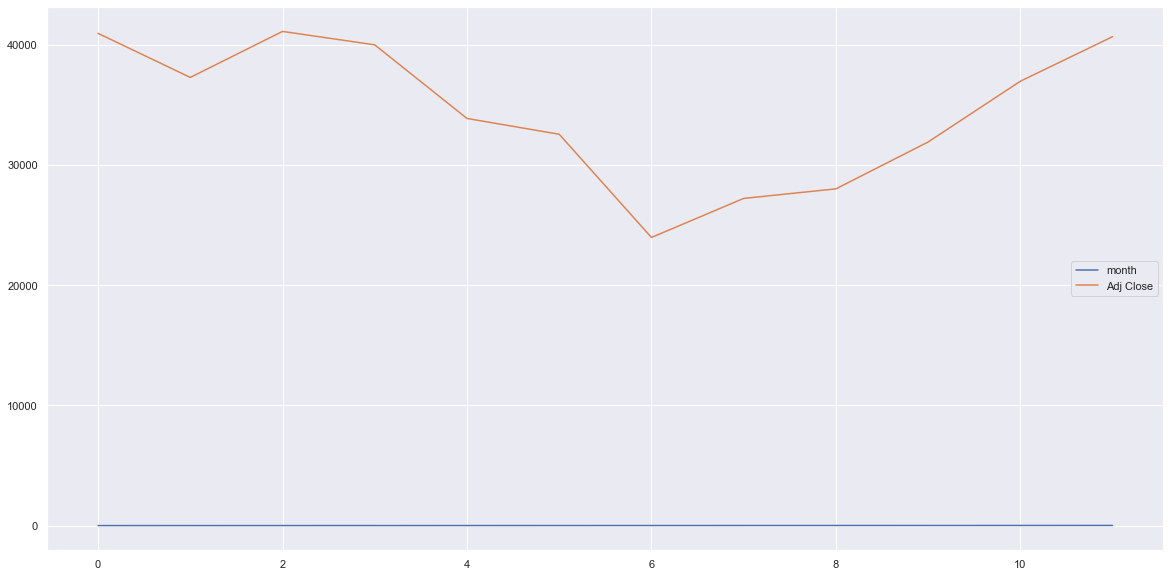

In [54]:
monthly_close_adj.plot()

In [56]:
import kaggle

In [57]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [59]:
api.dataset_download_file('beer-reviews',
                          file_name='https://www.kaggle.com/datasets/rdoume/beerreviews?select=beer_reviews.csv',
                          path='./')

ApiException: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json', 'Date': 'Sun, 26 Jun 2022 19:54:43 GMT', 'Access-Control-Allow-Credentials': 'true', 'Set-Cookie': 'ka_sessionid=0e72f6231a71f7b4fd1b3c2e4a8cf8c8; max-age=2626560; path=/, GCLB=CJWEsK_Ior2PMw; path=/; HttpOnly', 'Transfer-Encoding': 'chunked', 'Vary': 'Accept-Encoding', 'Turbolinks-Location': 'https://www.kaggle.com/api/v1/datasets/download/stephenkipkurui/beer-reviews/https:%2F%2Fwww.kaggle.com%2Fdatasets%2Frdoume%2Fbeerreviews%3Fselect=beer_reviews.csv', 'X-Kaggle-MillisecondsElapsed': '10', 'X-Kaggle-RequestId': '617fb585c2cdfca655ce1c0d6b32fdc4', 'X-Kaggle-ApiVersion': '1.5.12', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Content-Security-Policy': "object-src 'none'; script-src 'nonce-J1Aoz1COEZJTjqjdamJXZA==' 'report-sample' 'unsafe-inline' 'unsafe-eval' 'strict-dynamic' https: http:; frame-src 'self' https://www.kaggleusercontent.com https://www.youtube.com/embed/ https://polygraph-cool.github.io https://www.google.com/recaptcha/ https://form.jotform.com https://submit.jotform.us https://submit.jotformpro.com https://submit.jotform.com https://www.docdroid.com https://www.docdroid.net https://kaggle-static.storage.googleapis.com https://kaggle-static-staging.storage.googleapis.com https://kkb-dev.jupyter-proxy.kaggle.net https://kkb-staging.jupyter-proxy.kaggle.net https://kkb-production.jupyter-proxy.kaggle.net https://kkb-dev.firebaseapp.com https://kkb-staging.firebaseapp.com https://kkb-production.firebaseapp.com https://kaggle-metastore-test.firebaseapp.com https://kaggle-metastore.firebaseapp.com https://apis.google.com https://content-sheets.googleapis.com/ https://accounts.google.com/ https://storage.googleapis.com https://docs.google.com https://drive.google.com; base-uri 'none'; report-uri https://csp.withgoogle.com/csp/kaggle/20201130;", 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: b'{"code":404,"message":"Not found"}'
